In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

### Read Data

In [2]:
data = pd.read_csv("../dataset/archive/fake_or_real_news.csv")

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
# null control

In [5]:
data.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
# empty text cotrol

In [7]:
data.text = data.text.apply(lambda x: np.nan if x.isspace() else x)

In [9]:
data.isna().sum()

Unnamed: 0     0
title          0
text          36
label          0
dtype: int64

In [10]:
# detected empty data
data.dropna(how="any", inplace=True, axis=0)

In [11]:
data.shape

(6299, 4)

In [12]:
data.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [13]:
# base prediction line

In [14]:
import seaborn

<Axes: xlabel='label', ylabel='count'>

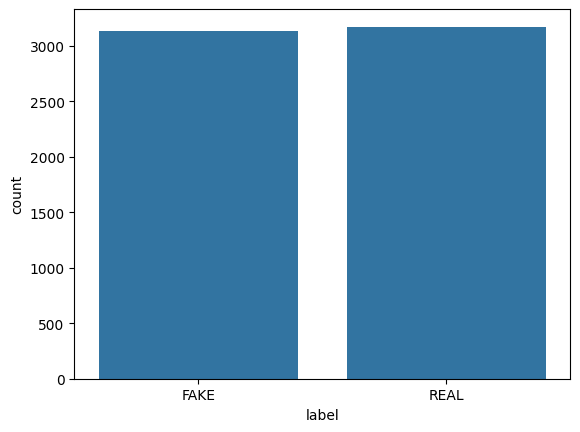

In [15]:
seaborn.countplot(data=data, x="label")

In [16]:
data.label.value_counts()

label
REAL    3171
FAKE    3128
Name: count, dtype: int64

In [49]:
# train test split
X = data.text
y = data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [50]:
# shape control
X_train.shape, y_train.shape

((4409,), (4409,))

In [54]:
# create pipeline
pipe_cls = Pipeline([("tfidf", TfidfVectorizer()),
                     ("classifier", LinearSVC())])

In [55]:
pipe_cls.fit(X_train, y_train)

/home/charon5/ML_AI/machine_learning_ai/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

In [56]:
# predict new value

In [34]:
predicted = pipe_cls.predict(X_test)

In [57]:
# metrics evaluating

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
confusion_matrix(y_test, predicted)

array([[851,  96],
       [ 96, 847]])

In [61]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

        FAKE       0.90      0.90      0.90       947
        REAL       0.90      0.90      0.90       943

    accuracy                           0.90      1890
   macro avg       0.90      0.90      0.90      1890
weighted avg       0.90      0.90      0.90      1890

